In [2]:
## Necessary Imports
import numpy as np
import matplotlib.pyplot as plt 

#used to resize plots in a grid 
def set_size(w,h, ax=None):
    """ w, h: width, height in inches """
    if not ax: ax=plt.gca()
    l = ax.figure.subplotpars.left
    r = ax.figure.subplotpars.right
    t = ax.figure.subplotpars.top
    b = ax.figure.subplotpars.bottom
    figw = float(w)/(r-l)
    figh = float(h)/(t-b)
    ax.figure.set_size_inches(figw, figh)
    
from bokeh.palettes import Viridis256, Cividis256, Turbo256
  

In [3]:
import pandas as pd
import numpy as np
from bokeh.layouts import gridplot
from bokeh.plotting import figure, show, save, output_file, reset_output
import os
from os import listdir
from os.path import isfile, join
from bokeh.palettes import Category10
from bokeh.models import Panel, Tabs, ColumnDataSource
from bokeh.layouts import column, row
import webbrowser
from bokeh.models import Label, Title, NumeralTickFormatter
from bokeh.models.widgets import DataTable, DateFormatter, TableColumn

TabPanel = Panel
colorscheme = Category10[10]
TOOLS = "pan,wheel_zoom,box_zoom,reset,save,box_select"
from bokeh.io import output_notebook

In [4]:
def extractor(fname, start, stop):
    accuracy = []
    values = {"name":[],"snr":[],"examples":[],"loss":[],"accuracy":[],"time":[],}
    with open(fname) as f:
        lines = f.readlines()
        for i in range(start, stop, 5):
            ctype=lines[i]
            ctype=ctype.split(' ')

            circ=ctype[5]#
            snr = ctype[15]
            snr = snr.strip('\n')
            loss=lines[i+1]
            time = lines[i+2]
            acc=lines[i+3]
            examples = ctype[12]
      
            acc=acc.split(':')
            acc=acc[1]
            acc=acc.replace("\n","")
            acc=float(acc)
            acc=acc*100
            acc=round(acc,2)
            accuracy.append(acc)
            acc=str(acc) + '%' 

            loss=loss.replace("]","")
            loss=loss.replace("[","")
            loss=loss.replace("\n","")
            data=[float(x) for x in loss.strip().split(',')]

            time=time.split(' ')
            time=time[2]
            time=time.replace('seconds.cc', '')
            time = round(float(time), 2)
           
            values["name"].append(circ)
            values["snr"].append(snr)
            values["examples"].append(examples)
            values["loss"].append(data)
            values["accuracy"].append(acc)
            values["time"].append(time)

    return(values)

In [19]:
import glob
figsize=(14,10)
width=0.75
color='black'
fontsize=28
ticksize=22
figsize=(14,10)

In [26]:
import glob

files=glob.glob(r'C:\Users\ivoll\OneDrive\Documents\qml_sin-3 copy\Quantum_data\qdata_10000_0.*.txt')

10000
testsdvhfsuyds 256
[ 0.00848  0.00414  0.00021  0.00456  0.0089   0.01322 -0.0175  -0.02174
  0.04159  0.0377  -0.03372 -0.02966 -0.02553 -0.02133  0.01708  0.0128
 -0.05636 -0.05964  0.06278  0.06576  0.06858  0.07124 -0.07372 -0.07603
 -0.02593 -0.03006  0.03411  0.03808  0.04196  0.04574 -0.0494  -0.05295
  0.08784  0.08817 -0.0883  -0.08821 -0.0879  -0.08738  0.08665  0.08571
  0.07763  0.07961 -0.0814  -0.08298 -0.08437 -0.08555  0.08652  0.08729
  0.06831  0.06548 -0.06248 -0.05933 -0.05603 -0.05261  0.04905  0.04537
  0.08456  0.08321 -0.08165 -0.0799  -0.07795 -0.07581  0.07349  0.07099
 -0.00956 -0.00522  0.00087 -0.00348 -0.00782 -0.01214  0.01643  0.02069
 -0.04254 -0.03868  0.03472  0.03068  0.02656  0.02238 -0.01815 -0.01387
  0.05552  0.05884 -0.06201 -0.06503 -0.06789 -0.07059  0.07312  0.07547
  0.02489  0.02903 -0.03311 -0.0371  -0.041   -0.0448   0.0485   0.05207
 -0.08772 -0.08811  0.08829  0.08825  0.088    0.08753 -0.08685 -0.08597
 -0.07711 -0.07914  0.08097

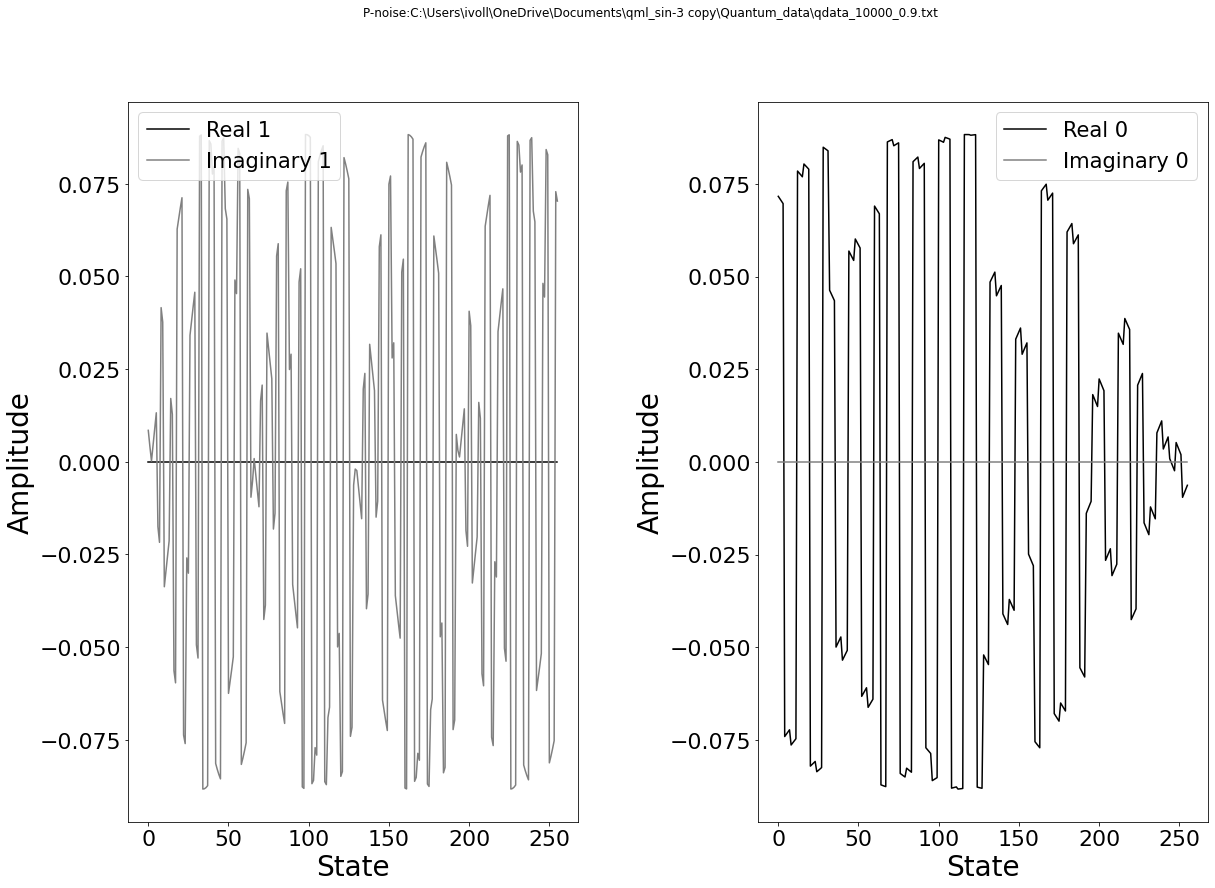

[-0.0439  -0.04762 -0.03615 -0.04007 -0.05804 -0.06125 -0.05122 -0.0547
 -0.06994 -0.07251 -0.06431 -0.06721 -0.07913 -0.08096 -0.0749  -0.07711
  0.02337  0.01915  0.03163  0.02753  0.00625  0.0019   0.01488  0.01057
 -0.01112 -0.01542 -0.00245 -0.00679 -0.02805 -0.03214 -0.01968 -0.0239
  0.07684  0.07461  0.08074  0.07889  0.06685  0.06393  0.0722   0.06961
  0.05427  0.05077  0.06085  0.05763  0.03958  0.03565  0.04716  0.04342
  0.08497  0.08604  0.08221  0.08369  0.088    0.08823  0.08691  0.08756
  0.08763  0.087    0.08824  0.08804  0.08386  0.0824   0.08616  0.08511
 -0.04295 -0.0467  -0.03516 -0.0391  -0.05722 -0.06046 -0.05033 -0.05384
 -0.06927 -0.07189 -0.06356 -0.0665  -0.07865 -0.08052 -0.07432 -0.07658
  0.02441  0.02021  0.03264  0.02856  0.00733  0.00299  0.01595  0.01165
 -0.01004 -0.01435 -0.00136 -0.00571 -0.02702 -0.03112 -0.01862 -0.02285
  0.07737  0.07519  0.08118  0.07937  0.06756  0.06467  0.07282  0.07027
  0.05512  0.05166  0.06164  0.05845  0.04055  0.0366

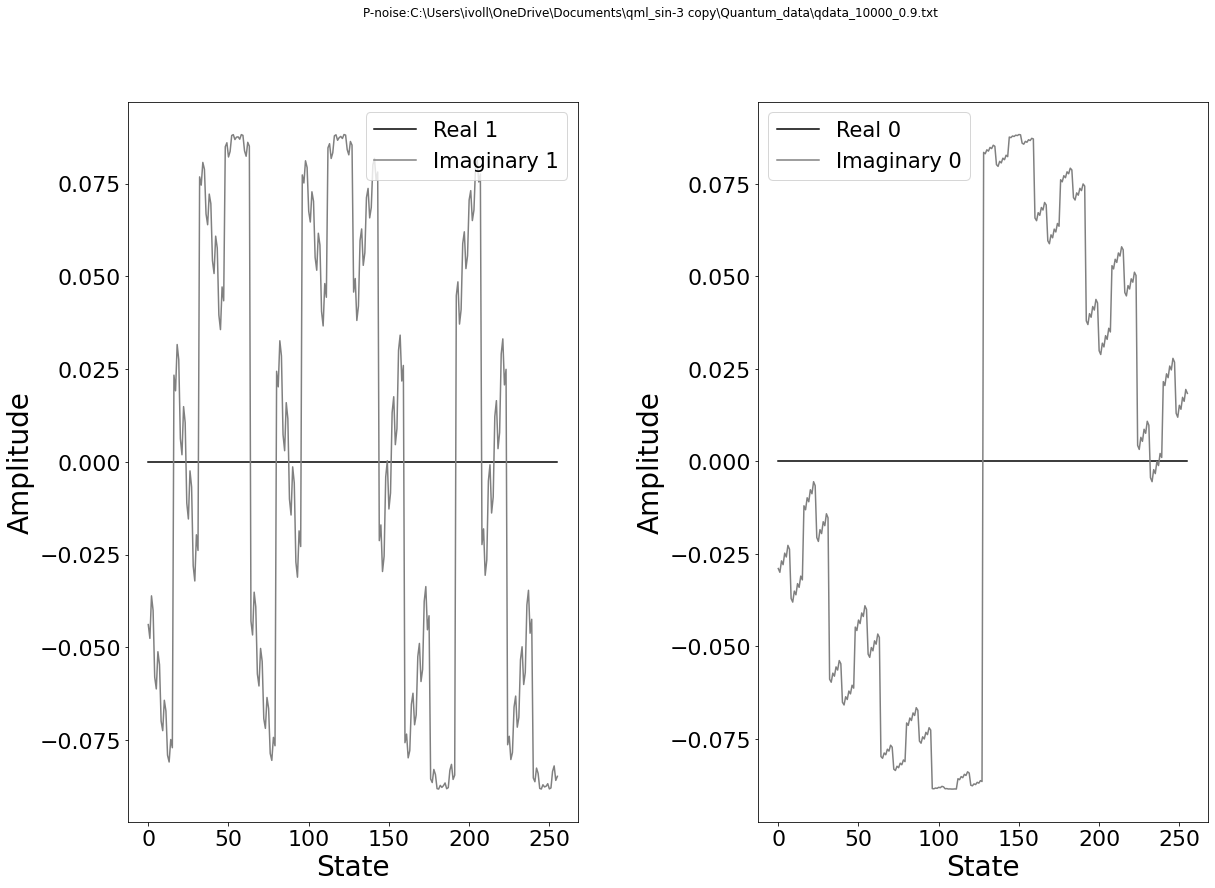

[ 0.02184 -0.01758 -0.01329  0.00896 -0.00461  0.00025 -0.00412  0.00847
 -0.05313  0.04957  0.0459  -0.04211  0.03822 -0.03424 -0.03018  0.02604
  0.07627 -0.07396 -0.07147  0.0688  -0.06597  0.06298  0.05984 -0.05655
 -0.0877   0.08699  0.08607 -0.08494  0.0836  -0.08206 -0.08032  0.07839
 -0.08568  0.08668  0.08747 -0.08804  0.08841 -0.08855 -0.08848  0.0882
  0.07052 -0.07307 -0.07545  0.07764 -0.07964  0.08145  0.08307 -0.08448
 -0.04454  0.04825  0.05185 -0.05533  0.05866 -0.06186 -0.06491  0.0678
  0.01172 -0.01603 -0.0203   0.02452 -0.02868  0.03278  0.03679 -0.04071
  0.02078 -0.01651 -0.01221  0.00787 -0.00352 -0.00084 -0.00521  0.00955
 -0.05225  0.04867  0.04496 -0.04115  0.03724 -0.03323 -0.02915  0.02499
  0.07571 -0.07335 -0.07082  0.06811 -0.06524  0.06221  0.05903 -0.05571
 -0.08754  0.08678  0.08581 -0.08462  0.08324 -0.08165 -0.07986  0.07788
 -0.08595  0.0869   0.08763 -0.08815  0.08846 -0.08855 -0.08843  0.0881
  0.07117 -0.07368 -0.07601  0.07816 -0.08012  0.08188

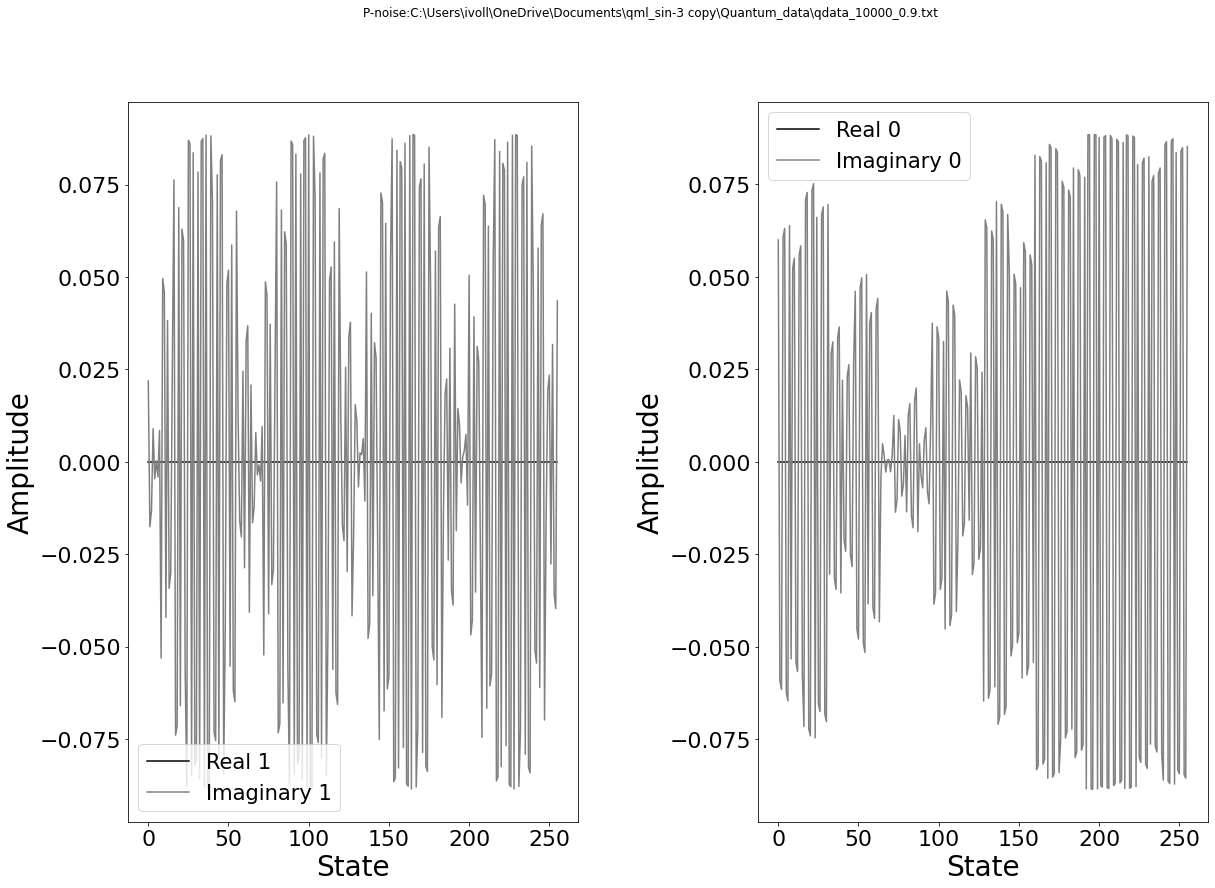

[-0.  0.  0. -0.  0. -0. -0.  0.  0. -0. -0.  0. -0.  0.  0. -0. -0.  0.
  0. -0.  0. -0. -0.  0.  0. -0. -0.  0. -0.  0.  0. -0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -0. -0.  0.  0.  0.
  0.  0. -0.  0.  0. -0.  0. -0. -0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0. -0. -0.  0. -0.  0.  0. -0. -0.  0.  0. -0.
  0. -0. -0.  0.  0.  0.  0.  0. -0.  0.  0. -0.  0.  0.  0.  0.  0.  0.
  0.  0.  0. -0. -0.  0. -0.  0.  0. -0. -0.  0.  0. -0.  0. -0. -0.  0.
  0. -0. -0.  0. -0.  0.  0. -0. -0.  0.  0. -0.  0. -0. -0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -0.  0.  0. -0.
  0.  0.  0.  0.  0. -0. -0.  0. -0.  0.  0. -0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0. -0.  0.  0. -0.  0. -0. -0.  0.  0. -0.
 -0.  0. -0.  0.  0. -0.  0.  0.  0.  0.  0. -0. -0

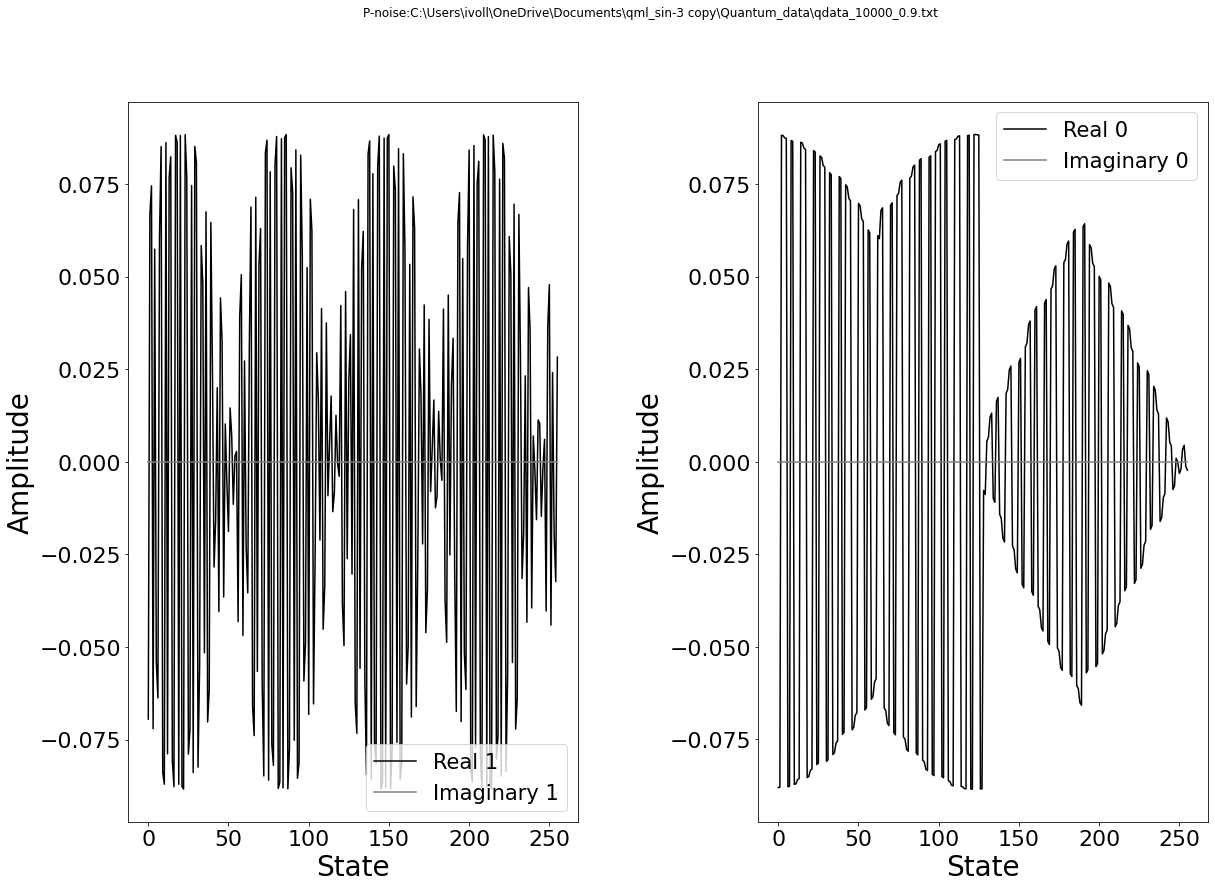

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[-0.08032+0.j  0.07986+0.j  0.07938+0.j -0.07889+0.j -0.08206+0.j
  0.08164+0.j  0.08122+0.j -0.08078+0.j  0.07627+0.j -0.07571+0.j
 -0.07513+0.j  0.07455+0.j  0.07839+0.j -0.07788+0.j -0.07735+0.j
  0.07681+0.j -0.08607

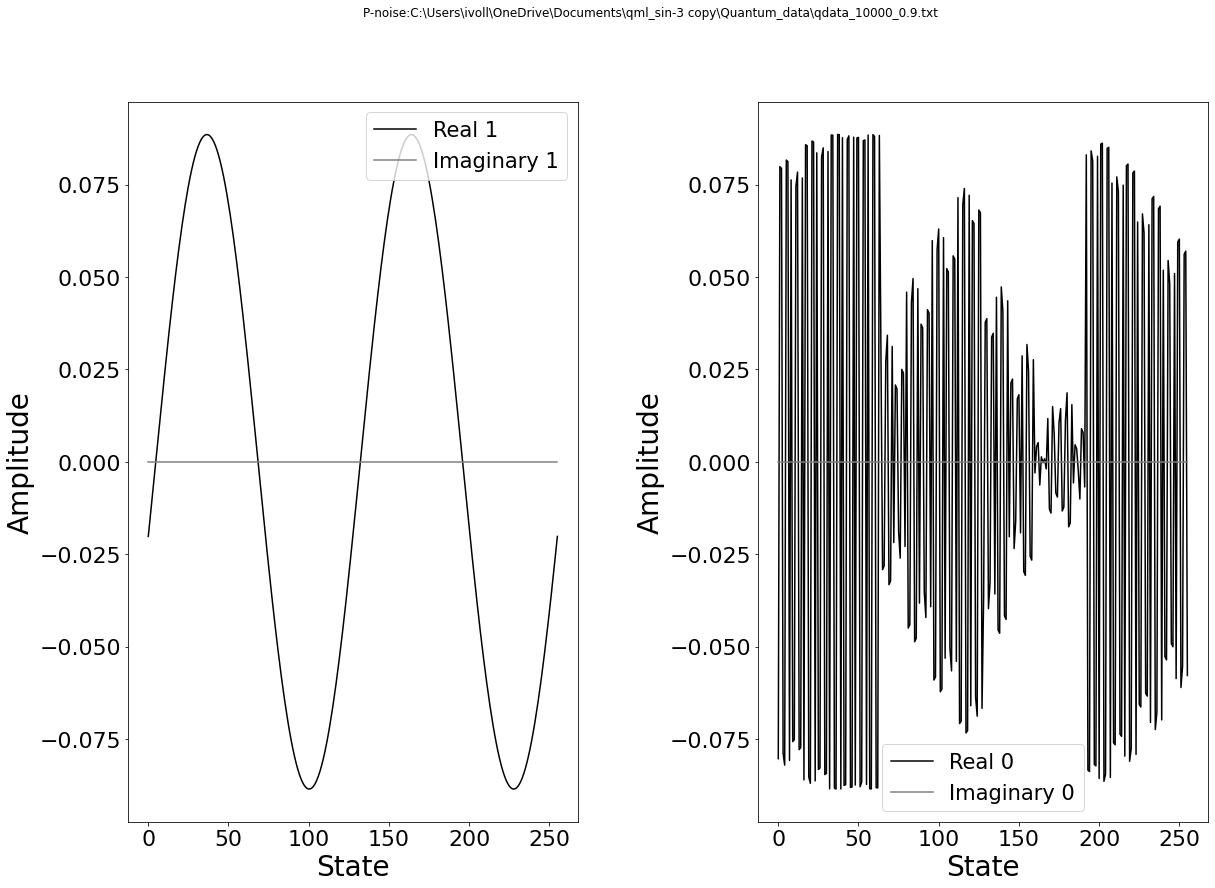

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -0.  0.  0.  0. -0.  0. -0.  0.
  0. -0.  0. -0.  0. -0.  0. -0. -0.  0. -0.  0. -0.  0. -0.  0.  0. -0.
  0. -0.  0. -0.  0. -0. -0.  0. -0.  0.  0. -0.  0. -0. -0.  0. -0.  0.
 -0.  0. -0.  0.  0. -0.  0. -0.  0. -0.  0. -0. -0.  0. -0.  0. -0.  0.
 -0.  0.  0. -0.  0. -0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -0.  0.  0.  0. -0.  0.
 -0.  0.  0. -0.  0. -0.  0. -0.  0. -0. -0.  0. -0.  0. -0.  0. -0.  0.
  0. -0.  0. -0.  0. -0.  0. -0. -0.  0. -0.  0.  0. -0.  0. -0. -0.  0.
 -0.  0. -0.  0. -0.  0.  0. -0.  0. -0.  0. -0.  0. -0. -0.  0. -0.  0.
 -0.  0. -0.  0.  0.  0.  0. -0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0

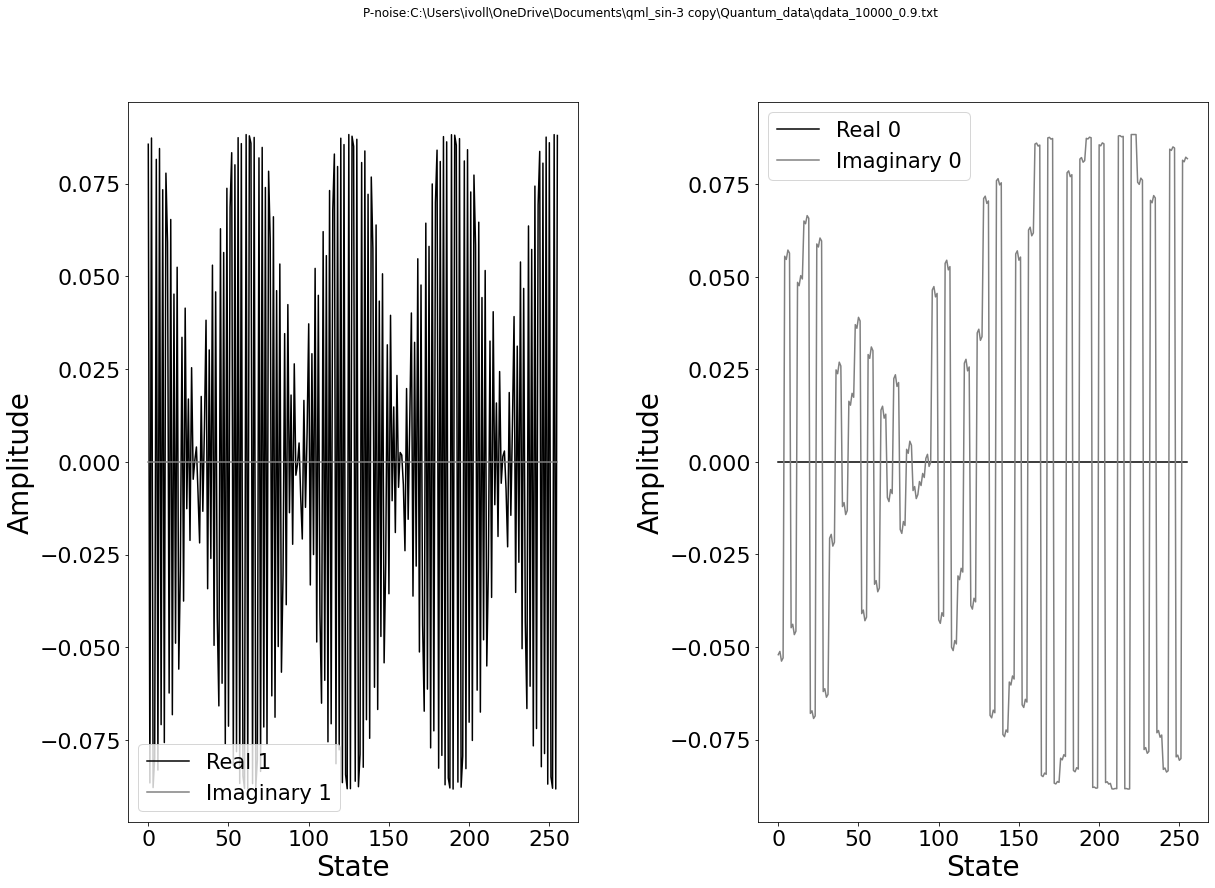

[-0.04864 -0.04495 -0.05565 -0.05221  0.03326  0.02919  0.04115  0.03725
  0.07321  0.07069  0.07771  0.07555 -0.06212 -0.05896 -0.068   -0.06514
 -0.01798 -0.02222 -0.00939 -0.0137   0.03456  0.03852  0.0264   0.03052
 -0.0166  -0.01231 -0.02505 -0.02085 -0.0007  -0.00505  0.00799  0.00365
 -0.07398 -0.07627 -0.06888 -0.07152  0.08199  0.0835   0.07837  0.08027
  0.0498   0.05333  0.04239  0.04615 -0.06312 -0.06608 -0.05673 -0.06
  0.08633  0.08531  0.08773  0.08713 -0.08103 -0.0792  -0.08409 -0.08266
 -0.08682 -0.0875  -0.08481 -0.08592  0.08828  0.08811  0.08798  0.08824
  0.04954  0.04588  0.05649  0.05308 -0.03427 -0.03022 -0.04211 -0.03823
 -0.07381 -0.07133 -0.07822 -0.07611  0.06289  0.05976  0.06869  0.06587
  0.01691  0.02116  0.0083   0.01262 -0.03356 -0.03754 -0.02536 -0.02949
  0.01767  0.01339  0.02609  0.02191 -0.00038  0.00396 -0.00907 -0.00473
  0.07339  0.07571  0.0682   0.07088 -0.08158 -0.08314 -0.07786 -0.07982
 -0.0489  -0.05246 -0.04143 -0.04522  0.06235  0.06535

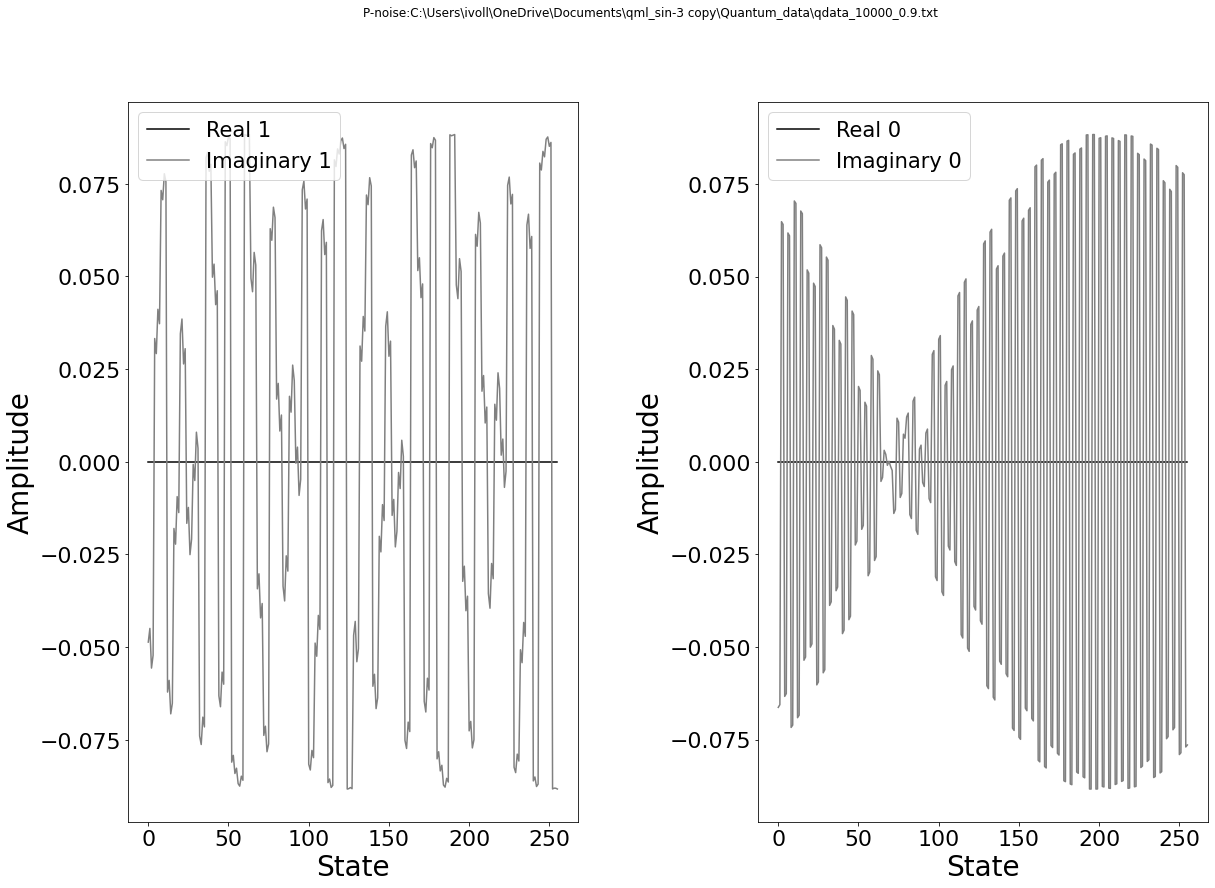

[-0.04586 -0.04952 -0.03821 -0.04209  0.05974  0.06287  0.05306  0.05647
  0.07131  0.07379  0.06585  0.06866 -0.08012 -0.08185 -0.07609 -0.0782
 -0.08583 -0.08674 -0.08338 -0.08471  0.08821  0.08827  0.08744  0.08793
  0.08717  0.08638  0.08812  0.08775 -0.08276 -0.08115 -0.08538 -0.08417
  0.07571  0.07338  0.07981  0.07786 -0.06536 -0.06235 -0.07088 -0.0682
 -0.05247 -0.04891 -0.0592  -0.0559   0.03755  0.03357  0.04523  0.04144
  0.02117  0.01693  0.0295   0.02537 -0.00398  0.00037 -0.01264 -0.00832
  0.01337  0.01765  0.00472  0.00905 -0.0302  -0.03425 -0.02189 -0.02607
 -0.04492 -0.04861 -0.03723 -0.04113  0.05894  0.0621   0.05218  0.05563
  0.07067  0.07319  0.06512  0.06797 -0.07966 -0.08144 -0.07553 -0.07769
 -0.08557 -0.08653 -0.08302 -0.08439  0.08816  0.08828  0.08729  0.08783
  0.08734  0.0866   0.08818  0.08786 -0.08313 -0.08157 -0.08565 -0.0845
  0.07626  0.07398  0.08027  0.07836 -0.06608 -0.06312 -0.07152 -0.06888
 -0.05334 -0.04981 -0.06    -0.05674  0.03853  0.03457

KeyboardInterrupt: 

In [70]:
for fname in files[8:]:
    with open(fname) as f:
        lines = f.readlines()
        all=''.join(lines)
        allstates=all.split(')], ')
        #print(len(allstates))
        labels=allstates[1]
        labels=labels[:-1]
        labels=labels.strip(']')
        labels=labels.strip('[')
        labels=labels.split(',')
        labels=[eval(i) for i in labels]
        #print(labels)
        #print(all[len(labels):])
        #all= all[:len(labels)]
        #all = all.replace('[array(','')
        all = all.split('),')
        #print(all)
        print(len(all))
        jj=0
        all_new=[]
        for item in all:
        #    print(item)
            item = item.replace('[array(','')
            item = item.replace('rray([','')
            item=item[2:-1]
            #print(item)
            item=item.replace('\n       ','')
            item=item.replace('  ','')
            item=item.replace(' ','')
            item=item.split(',')
            #print(item)
            #print(len(item))
            #print(jj,len(item))

            if jj == 9999:

                item=';'.join(item)
                #print(item)
                item=item.split(')')
                item=item[0]
                item=item[:-1]
                #print(item)
                item=item.split(';')
                print('testsdvhfsuyds',len(item))
            if len(item) == 256:
                gg=[]
                for i in item:
                    #try:
                    #print(i)
                    h=np.complex128(i)
                    #print(h.real,h.imag)
                    gg.append(h)
                    #gg= np.append(gg,h)
                    #except:
                    #print(i)
                    #print(i)

            #    break
                jj=jj+1
            #break
            gg=np.array(gg,dtype=complex)
            
            #print(type(gg))
            all_new.append(gg)
        dataset=[all_new,labels]
        
        for i in range (0,200):
            all_new_s = dataset[0][0+i]
            print(all_new_s.imag)
            kind = dataset[1][0+i]
            #fig = plt.figure(figsize=figsize)
            fig = plt.figure()
            #distance between subplots in the output
            fig.subplots_adjust(hspace=0.4,wspace=0.4)
            fig.suptitle('P-noise:'+fname)
            ax=fig.add_subplot(1,2,1)
            #ax = fig.add_subplot(111)
            ax.plot(all_new_s.real, color='black', label='Real '+ str(kind))
            ax.plot(all_new_s.imag, color='grey', label='Imaginary '+ str(kind))

            ax.tick_params(axis='both', labelsize=ticksize)
            ax.set_xlabel('State', fontsize=fontsize)
            ax.set_ylabel('Amplitude', fontsize=fontsize)
            leg = ax.legend(fontsize=3*fontsize//4)

            all_new_s = dataset[0][0+5000+i]
            kind = dataset[1][0+5000+i]
            #fig = plt.figure(figsize=figsize)
            #ax = fig.add_subplot(211)
            ax=fig.add_subplot(1,2,2)
            ax.plot(all_new_s.real, color='black', label='Real '+ str(kind))
            ax.plot(all_new_s.imag, color='grey', label='Imaginary '+ str(kind))
            print(all_new_s)
            ax.tick_params(axis='both', labelsize=ticksize)
            ax.set_xlabel('State', fontsize=fontsize)
            ax.set_ylabel('Amplitude', fontsize=fontsize)
            leg = ax.legend(fontsize=3*fontsize//4)
            set_size(15,10)
            plt.show()
        #print(len(all_new))
        #print(type(all_new[0]),labels[0])

10000
testsdvhfsuyds 256


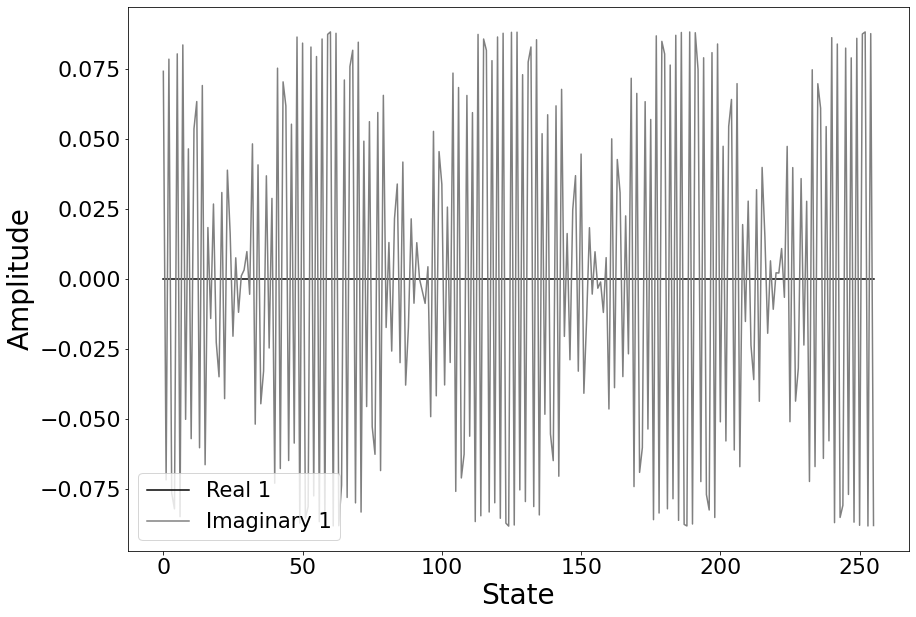

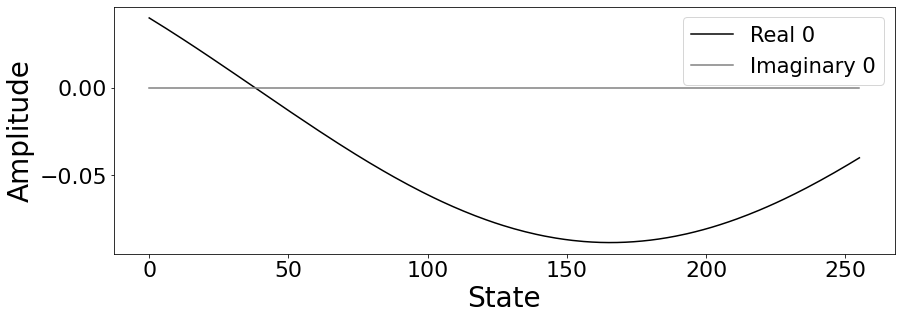

In [24]:


fname =r'C:\Users\ivoll\OneDrive\Documents\qml_sin-3 copy\Quantum_data\qdata_10000_0.8.txt'
with open(fname) as f:
    lines = f.readlines()
    all=''.join(lines)
    allstates=all.split(')], ')
    #print(len(allstates))
    labels=allstates[1]
    labels=labels[:-1]
    labels=labels.strip(']')
    labels=labels.strip('[')
    labels=labels.split(',')
    labels=[eval(i) for i in labels]
    #print(labels)
    #print(all[len(labels):])
    #all= all[:len(labels)]
    #all = all.replace('[array(','')
    all = all.split('),')
    #print(all)
    print(len(all))
    jj=0
    all_new=[]
    for item in all:
    #    print(item)
        item = item.replace('[array(','')
        item = item.replace('rray([','')
        item=item[2:-1]
        #print(item)
        item=item.replace('\n       ','')
        item=item.replace('  ','')
        item=item.replace(' ','')
        item=item.split(',')
        #print(item)
        #print(len(item))
        #print(jj,len(item))

        if jj == 9999:
            
            item=';'.join(item)
            #print(item)
            item=item.split(')')
            item=item[0]
            item=item[:-1]
            #print(item)
            item=item.split(';')
            print('testsdvhfsuyds',len(item))
        if len(item) == 256:
            gg=[]
            for i in item:
                #try:
                h=np.complex128(i)
                gg.append(h)
                #gg= np.append(gg,h)
                #except:
                #print(i)
                #print(i)
            
        #    break
            jj=jj+1
        #break
        gg=np.array(gg,dtype=complex)
        #print(type(gg))
        all_new.append(gg)
    
    #plt.plot(dataset[0][1], label=dataset[1][1])
    #plt.plot(dataset[0][1+5000], label=dataset[1][1+5000])
    #l+=1
    #plt.xlabel('Time')
    #plt.ylabel('Strain')
    #plt.legend()
    #plt.show()
#print(len(all_new))
#print(type(all_new[0]),labels[0])

In [12]:
all_new[0]

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

## Training data plot

In [52]:
def sin_gen3o(snr, length, noisefreq): #input snr as power ratio
    data_length = 256
    x = np.linspace(0,2*np.pi,data_length) #create "time series" over period 2pi with data_length points 
    outputs = [] # initialize empty example and label arrays
    labels = []

    for i in range(0,length): #10000 total examples (training and test)

        #f=np.random.randint(10,20)          #random freq and phase to give sin wave
        f=2
        f=10
        phase = np.random.randint(0,256)
        signal = np.sin((f*x)+phase)
        sig_avg_power = np.mean(signal**2)
        #noise_power = sig_avg_power / snr
        if snr == 0:
            noise = [1e-20] * data_length
        else:
            noise_power = sig_avg_power / snr
            noise = np.random.normal(0,np.sqrt(noise_power),data_length)   #normal dist. mean 0, st.dev. given by noise power
        
        if i < (length/2): #half of examples to be signal with noise
            output = signal + noise
            #output=[float(i)/max(output) for i in output] #normalise datas
            label = 1 
        else:       #half of examples only noise
            output = np.sin((noisefreq*x)+ phase) + noise
            #output = [0.00000001] * data_length
            #output=[float(i)/max(output) for i in output] #normalise noise
            label = 0 #label corresponding to just noise is 0
    
        outputs.append(output) #add example to array
        labels.append(label) #add corresponding label to array
    
    dataset = [outputs, labels] #entire dataset contains all examples and their corresponding labels
    return(dataset)

## Test data plot

In [3]:
import sin_generator


 Volume in drive C is OS
 Volume Serial Number is 8A51-BD5D

 Directory of C:\Users\ivoll\OneDrive\Documents\qml_sin-3 copy

06/03/2023  18:49    <DIR>          .
06/03/2023  18:49    <DIR>          ..
08/02/2023  10:31    <DIR>          .dist
17/02/2023  18:33             6,148 .DS_Store
17/02/2023  18:33    <DIR>          .git
17/02/2023  18:33                38 .gitignore
03/03/2023  09:05    <DIR>          .ipynb_checkpoints
17/02/2023  18:33             3,646 Benchmarking.py
05/03/2023  16:44            15,913 Benchmarking_pn_gn.py
02/03/2023  12:36             3,623 CNN copy.py
06/03/2023  16:31    <DIR>          CNN New
25/02/2023  18:26             3,628 CNN.py
17/02/2023  18:33    <DIR>          Data
01/03/2023  15:13        37,384,943 Dataset demo.ipynb
02/03/2023  12:45    <DIR>          Final_Results_CNN
17/02/2023  18:33           573,728 plotting_ivo.ipynb
06/03/2023  18:05            92,756 QCNN Loss.png
17/02/2023  18:33             7,242 QCNN_circuit.py
06/03/2023  13:

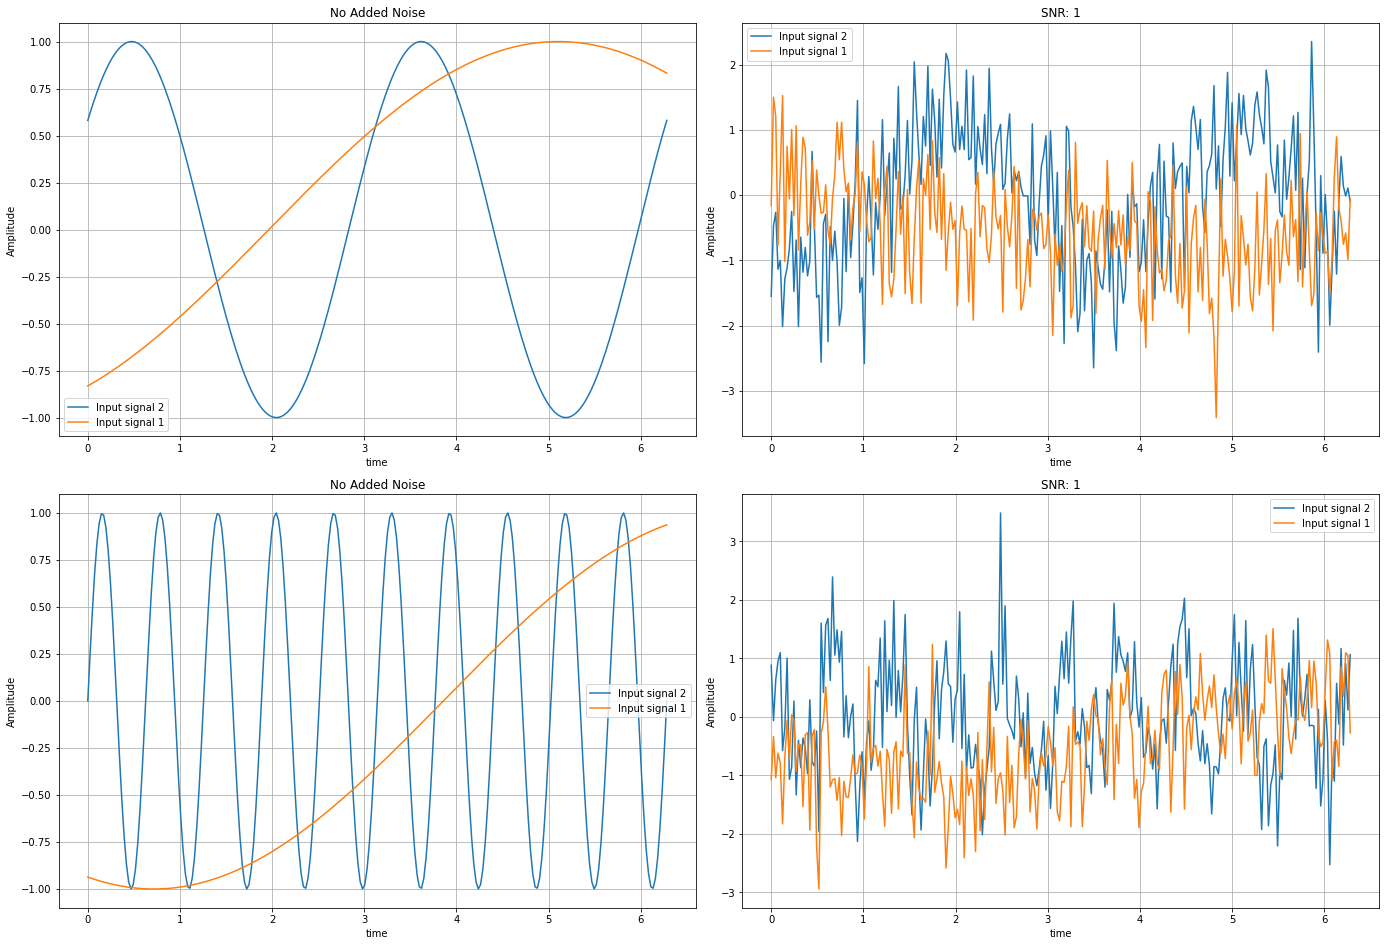

In [10]:

for jj in range(0,20):
    fig = plt.figure()
    #distance between subplots in the output
    fig.subplots_adjust(hspace=0.4,wspace=0.4)
    x = np.linspace(0,2*np.pi,256)
    #fig.suptitle('Input Signal with SNR: '+str(jj))

    jj=0
    kk=0
    #plots 6 graphs in a 2x3 array
    for i in range(1,5):
        ax=fig.add_subplot(2,2,i)
        if i < 3:
            dataset = sin_generator.sin_gen3o(jj, 100,0.5)
            jj=jj+1
        else:
            dataset = sin_generator.sin_gen3o10(kk, 100,0.5)
            kk=kk+1
        #gets the the step size from the list above


        #calculate the analytical solution
        #t=np.arange(0,100+h,h)


        #plots the analytical and euler solution on the same graph
        #ax.plot(t,a,label="Bacteria Problem analytical solution")
        label=dataset[1][i]
        if label == 0:
            l='signal 1'
        else:
            l='signal 2'
        ax.plot(x,dataset[0][i],label='Input '+ l)
        label=dataset[1][i+int(len(dataset[0])/2)]
        if label == 0:
            l='signal 1'
        else:
            l='signal 2'
        ax.plot(x,dataset[0][i+int(len(dataset[0])/2)],label='Input '+ l)
        #ax.plot(e1[0],e1[1], label ="Euler method \n where h="+str(h))  

        #log scaled and axis labels 
        #ax.set_yscale('log')
        ax.set_xlabel("time")
        ax.set_ylabel("Amplitude")
        ax.grid()
        ax.legend()
        if jj == 1 or kk == 1:
            plt.title('No Added Noise')
        elif i < 3:
            plt.title('SNR: '+str(jj-1))
        else:
            plt.title('SNR: '+str(kk-1))
        #graph scaled
        set_size(15,10)
        #jj=jj+1
    plt.tight_layout()
    plt.show()
    break

In [51]:
for s in range(10,200+10,10):
    print(s)

10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200


In [71]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(2664)
import random
from sklearn.preprocessing import normalize

from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, execute, Aer, IBMQ
from qiskit.quantum_info import Pauli
from qiskit.tools.visualization import circuit_drawer
import itertools as it
#import numpy as np
import matplotlib.pyplot as plt
import matplotlib

import Benchmarking

#matplotlib.rcParams['mathtext.fontset'] = 'stix'
#matplotlib.rcParams['font.family'] = 'STIXGeneral'
width=0.75
color='black'
fontsize=28
ticksize=22
figsize=(14,10)

ModuleNotFoundError: No module named 'qiskit'

In [72]:
pip install qiskit

^C
Note: you may need to restart the kernel to use updated packages.


In [76]:
import glob

images_files=glob.glob(r'C:\Users\ivoll\OneDrive\Documents\qml_sin-3 copy\Quantum_Circuit\s*.png')

In [74]:
images

['C:\\Users\\ivoll\\OneDrive\\Documents\\qml_sin-3 copy\\Quantum_Circuit\\stitch_0.png',
 'C:\\Users\\ivoll\\OneDrive\\Documents\\qml_sin-3 copy\\Quantum_Circuit\\stitch_1.png',
 'C:\\Users\\ivoll\\OneDrive\\Documents\\qml_sin-3 copy\\Quantum_Circuit\\stitch_10.png',
 'C:\\Users\\ivoll\\OneDrive\\Documents\\qml_sin-3 copy\\Quantum_Circuit\\stitch_11.png',
 'C:\\Users\\ivoll\\OneDrive\\Documents\\qml_sin-3 copy\\Quantum_Circuit\\stitch_12.png',
 'C:\\Users\\ivoll\\OneDrive\\Documents\\qml_sin-3 copy\\Quantum_Circuit\\stitch_13.png',
 'C:\\Users\\ivoll\\OneDrive\\Documents\\qml_sin-3 copy\\Quantum_Circuit\\stitch_14.png',
 'C:\\Users\\ivoll\\OneDrive\\Documents\\qml_sin-3 copy\\Quantum_Circuit\\stitch_15.png',
 'C:\\Users\\ivoll\\OneDrive\\Documents\\qml_sin-3 copy\\Quantum_Circuit\\stitch_16.png',
 'C:\\Users\\ivoll\\OneDrive\\Documents\\qml_sin-3 copy\\Quantum_Circuit\\stitch_17.png',
 'C:\\Users\\ivoll\\OneDrive\\Documents\\qml_sin-3 copy\\Quantum_Circuit\\stitch_18.png',
 'C:\\Users\

In [78]:
import imageio
images = []
for images_file in images_files:
    images.append(imageio.imread(images_file))
imageio.mimsave(r'C:\\Users\\ivoll\\OneDrive\\Documents\\qml_sin-3 copy\\Quantum_Circuit\\movie.gif', images)

In [79]:
import glob
import contextlib
from PIL import Image

In [86]:
fp_in = r'C:\Users\ivoll\OneDrive\Documents\qml_sin-3 copy\Quantum_Circuit\s*.png'
fp_out = r'C:\\Users\\ivoll\\OneDrive\\Documents\\qml_sin-3 copy\\Quantum_Circuit\\movie1.gif'

In [87]:
#Image.open(images_files[0])

In [88]:
with contextlib.ExitStack() as stack:

    # lazily load images
    imgs = (stack.enter_context(Image.open(f))
            for f in sorted(glob.glob(fp_in)))

    # extract  first image from iterator
    img = next(imgs)

    # https://pillow.readthedocs.io/en/stable/handbook/image-file-formats.html#gif
    img.save(fp=fp_out, format='GIF', append_images=imgs,
             save_all=True, duration=200, loop=0)

In [ ]:
def depolarisation_channel(circ, qreg, p, wrap=False, inverse=False, label='depol_channel'):
    """
    Given a quantum circuit, applies a depoloarisation channel to a given register with probability p.
    
    circ:    Qiskit circuit object.
    qreg:    Qiskit circuit quantum register object.
    p:       Probability of applying Pauli operation to a given qubit, otherwise apply identity (float).
    wrap:    Wrap operation into a single gate (bool) default=False.
    inverse: Apply the inverse operation (bool) default=False.
    label:   Name given to wrapped operation (str) default='depol_channel'.
    """
    
    n = qreg.size

    if inverse:
        wrap = True

    if wrap:
        qreg = QuantumRegister(n, 'q_reg')
        circ = QuantumCircuit(qreg)

    num_terms = 4**n
    max_param = num_terms / (num_terms - 1)

    if p < 0 or p > max_param:
        raise NoiseError("Depolarizing parameter must be in between 0 "
                         "and {}.".format(max_param))

    prob_iden = 1 - p / max_param
    prob_pauli = p / num_terms
    probs = [prob_iden] + (num_terms - 1) * [prob_pauli]

    paulis = [Pauli("".join(tup)) for tup in it.product(['I', 'X', 'Y', 'Z'], repeat=n)]
    #print(paulis)
    gates_ind = np.random.choice(num_terms, p=probs, size=1)
    #print('gi',gates_ind,p)
    gates_ind = gates_ind[0]
    #gates = paulis[gates_ind]
    #print(gates_ind)
    gates = paulis[gates_ind]
    #print(gates)
    #print(gates,qreg[:])
    #jj=0
    #for gate in gates:
    #    circ.append(gate, [qreg[jj]])
    #    jj=jj+1
    
    circ.append(gates, qreg[:])

    if wrap:
        circ = circ.to_gate()
        circ.label = label

    if inverse:
        circ = circ.inverse()
        circ.label = label+'†'

    return circ

data=sin_gen(5, 10000)
qdata=[]


def quantum_data(p):

    #p = 0.8
    n = 8
    print('generating data')
    data=sin_gen(5, 10000)
    print('generated data')

    outputs=[] #add example to array
    labels=[] #add corresponding label to array
    f = open('Quantum_data/qdata_10000_'+str(p)+'.txt', 'a')
    for i in range(0,len(data[0])):
        #print(i)
        if i%100 == 0:
            print(i)
        wave=data[0][i]
        wave = wave/np.sqrt(np.sum(np.abs(wave)**2))
        #print(wave)
        label=data[1][i]
        q_reg = QuantumRegister(n, 'q_reg')
        circ = QuantumCircuit(q_reg)
        circ.initialize(wave, q_reg)
        backend = Aer.get_backend('statevector_simulator')
        circ = depolarisation_channel(circ, q_reg, p)
        job = execute(circ, backend)
        result = job.result()
        out_state = np.array(result.get_statevector(circ, decimals=5))
        labels.append(label)
        outputs.append(out_state)
        
    f_out=[outputs,labels]
    #np.savetxt('outfile.txt', array.view(float))
    f.write(str(f_out))
    f.close()

    return f_out

        #fig = plt.figure(figsize=figsize)
        #ax = fig.add_subplot(111)
        #ax.plot(wave.real, color='black', label='Real')
        #ax.plot(wave.imag, color='grey', label='Imaginary')

        #ax.tick_params(axis='both', labelsize=ticksize)
        #ax.set_xlabel('State', fontsize=fontsize)
        #ax.set_ylabel('Amplitude', fontsize=fontsize)

        #leg = ax.legend(fontsize=3*fontsize//4)
        #plt.savefig('Quantum_data1/new run '+str(i)+'input waveform '+str(p)+'.png')

        #fig = plt.figure(figsize=figsize)
        #ax = fig.add_subplot(111)
        #ax.plot(out_state.real, color='black', label='Real')
        #ax.plot(out_state.imag, color='grey', label='Imaginary')

        #ax.tick_params(axis='both', labelsize=ticksize)
        #ax.set_xlabel('State', fontsize=fontsize)
        #ax.set_ylabel('Amplitude', fontsize=fontsize)

        #leg = ax.legend(fontsize=3*fontsize//4)

        #plt.show()
        #plt.savefig('Quantum_data1/new run '+str(i)+'output waveform '+str(p)+'.png')

        #circ.draw('mpl')
        #circuit_drawer(circ, output='mpl', plot_barriers=False)
        #circ.draw("mpl", cregbundle=False, initial_state=True, reverse_bits=True)
        #circ.decompose(reps=1).draw('mpl')
        #plt.savefig('Quantum_data1/'+str(i)+'circuit other method E'+str(p)+'.png')
        #break
    
    
    #outputs.append(out_state)
    




    


